In [650]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sci
import autograd as ad
import autograd.numpy as np

In [737]:
phi = np.linspace(-0.1,0.1,10000)
def U_s(phi): 
    N=2
    beta = 0.5
    phi_ex = 0.5*2*np.pi
    ratio = 0.0
    return (-beta*np.cos(1*(phi)-phi_ex)-N*np.cos(1*phi/N))+ratio*phi**2
# def U_sapp(phi): 
#     beta = 0.15
#     phi_ex = 0.4*2*np.pi
#     return (-3*np.cos((phi)/3)-beta*(1+1/2*(phi-phi_ex)**2+1/4/3/2*(phi-phi_ex)**4))

Text(0.5, 1.0, 'β = 0.15')

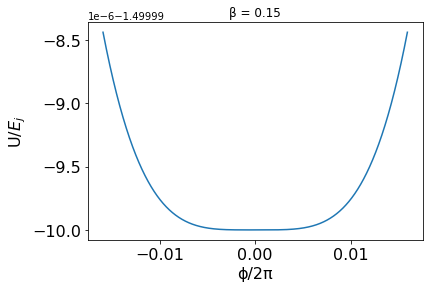

In [738]:
# plt.plot(phi,U_sapp(phi),label='app')
plt.plot(phi/2/np.pi,U_s(phi),label='exact')
# plt.ylim(-1.1000000001,-1.09999999)
plt.xlabel('ϕ/2π',fontsize=16)
plt.ylabel('U/$E_j$',fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.title("β = 0.15")

In [739]:
phi_min = sci.optimize.minimize(U_s,0).x

In [740]:
phi_min/2/np.pi

array([0.])

In [741]:
firstd = ad.grad(U_s)
secondd = ad.grad(firstd)
secondd(phi_min)

array([0.])

In [778]:
from autograd.extend import primitive, defvjp
def annihilation(dim):
    return np.diag(np.sqrt(np.arange(1,dim)),1)
def creation(dim):
    return np.diag(np.sqrt(np.arange(1,dim)),-1)

def g3g4(phi_ex,beta,N,Ej,Ec,omega_c,g_intfa,ratio):
    phi_ex = phi_ex
    def U_s(phi): 
        return (-beta*np.cos(phi-phi_ex)-N*np.cos((phi)/N))+ratio*phi**2
    @primitive
    def Us_min(phi_ex):
        def U_s(phi): 
            return (-beta*np.cos(phi-phi_ex)-N*np.cos((phi)/N))
        phi_min = sci.optimize.minimize(U_s,0).x
        return phi_min
    phi_min = Us_min(phi_ex)
    # potential expansion around minimum
    firstd = ad.grad(U_s)
    secondd = ad.grad(firstd)
    thirdd = ad.grad(secondd)
    fourd = ad.grad(thirdd)
    fived = ad.grad(fourd)
    c2 = secondd(phi_min)
    c3 = thirdd(phi_min)
    c4 = fourd(phi_min)
    six = ad.grad(fived)
    c6 = six(phi_min)
    phi_zpf = np.power(2*Ec/(Ej*c2),1/4)
    c5 = fived(phi_min)
    g2 = Ej*phi_zpf**2*c2/2
    g3 = Ej*phi_zpf**3*c3/3/2
    g4 = Ej*phi_zpf**4*c4/4/3/2
    g5 = Ej*phi_zpf**5*c5/5/4/3/2
    g6 = Ej*phi_zpf**5*c5/6/5/4/3/2
    omega_s = np.sqrt(8*Ec*Ej*c2)
    sdim = 30
    sd = creation(sdim)
    s = annihilation(sdim)
    x = sd+s
    x2 = x@x
    Hs = (omega_s * np.matmul(sd,s)
        - Ej*(beta*cosm(phi_zpf*(s+sd)+(phi_min-phi_ex)*np.identity(sdim))
        + N*cosm((phi_zpf*(s+sd)+phi_min*np.identity(sdim))/N))- g2*x2)
    energy = np.linalg.eigh(Hs)[0]
    energy = energy-energy[0]*np.ones(len(energy))
    omega_s = energy[1]
    anh = (energy[2]-energy[1]-energy[1]-energy[0])
    g_int = g_intfa*2*np.pi*np.power((2*Ec)/Ej,1/4)/phi_zpf
    delta = omega_s - omega_c
    return g3/2/np.pi,g4/2/np.pi,omega_s/2/np.pi,anh/2/np.pi

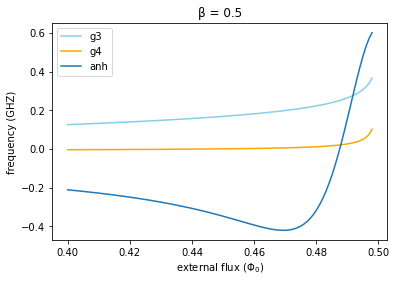

In [791]:
from cosmatrix import cosm
beta = 0.5
omega_c = 2*2*np.pi
N = 2
Ej = 70*2*np.pi
Ec = 0.15*2*np.pi
phi_exs = np.linspace(0.4*2*np.pi,0.498*2*np.pi,100)
snail_energies = np.zeros(len(phi_exs))
der = np.zeros(len(phi_exs))
anhs = np.zeros(len(phi_exs))
g3s = np.zeros(len(phi_exs))
g4s = np.zeros(len(phi_exs))
omegass = np.zeros(len(phi_exs))
god = np.zeros(len(phi_exs))
for i in range(len(phi_exs)):
    g3s[i],g4s[i],omegass[i],anhs[i] = g3g4(phi_exs[i],beta,N,Ej,Ec,omega_c,0.1,0)
plt.plot(phi_exs/2/np.pi,g3s, label = 'g3',color = '#87CEEB')
plt.plot(phi_exs/2/np.pi,g4s,label = 'g4',color = '#FFA500')
plt.plot(phi_exs/2/np.pi,anhs,label = 'anh')
plt.xlabel('external flux ($\Phi_0$)')
plt.ylabel('frequency (GHZ)')
omega_c = float(omega_c/2/np.pi)
plt.title('β = '+str(beta))
plt.legend()

Text(0, 0.5, '$ω_s$')

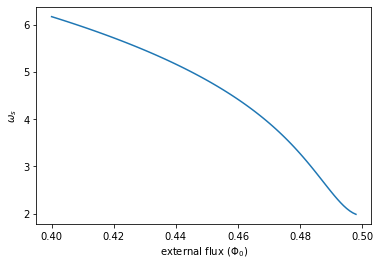

In [792]:
plt.plot(phi_exs/2/np.pi,omegass, label = 'ω_s',)
plt.xlabel('external flux ($\Phi_0$)')
plt.ylabel('$ω_s$')